In [62]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score

In [19]:
#  !pip install xlrd
# Load the XLS file
xls_file = "default_credit_score.xls"
df = pd.read_excel(xls_file)

# Set the second row as header
df.columns = df.iloc[0]  # Assign the second row as header
df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# Save as CSV
csv_file = "default_credit_score.csv"
df.to_csv(csv_file, index=False)

print(f"File saved as {csv_file} with corrected headers.")

File saved as default_credit_score.csv with corrected headers.


In [20]:
df = pd.read_csv("default_credit_score.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
df.columns = ['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 
               'PAY_ST9', 'PAY_ST8', 'PAY_ST7', 'PAY_ST6', 'PAY_ST5','PAY_ST4',
               'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 
               'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'DEFAULT_PAYMENT']

df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,DEFAULT_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Credit Card Default Dataset

## 🔹 Dependent Variable (Target Variable)
- `default payment next month` (Binary Variable)
  - `1`: Default (Yes)
  - `0`: No Default (No)

---

## 🔹 Explanatory Variables (23 Total)
### 📌 1. Personal Information
- **X1**: Credit limit amount (NT dollars) – includes both individual and family (supplementary) credit.
- **X2**: Gender  
  - `1`: Male  
  - `2`: Female  
- **X3**: Education Level  
  - `1`: Graduate school  
  - `2`: University  
  - `3`: High school  
  - `4`: Others  
- **X4**: Marital Status  
  - `1`: Married  
  - `2`: Single  
  - `3`: Others  
- **X5**: Age (Years)

---

### 📌 2. Past Payment History (`X6 - X11`)
- Monthly repayment records from **April to September 2005**  
  - **X6**: Repayment status in September 2005  
  - **X7**: Repayment status in August 2005  
  - **X8**: Repayment status in July 2005  
  - **X9**: Repayment status in June 2005  
  - **X10**: Repayment status in May 2005  
  - **X11**: Repayment status in April 2005  

📌 **Repayment Status Codes**
- `-1`: Paid on time
- `-2`: not used
- `1`: 1-month delay  
- `2`: 2-month delay  
- ...  
- `9`: 9+ months delay  

---

### 📌 3. Monthly Bill Statement Amount (`X12 - X17`)
- Credit card bill statement amounts (NT dollars) for each month  
  - **X12**: Bill amount in September 2005  
  - **X13**: Bill amount in August 2005  
  - **X14**: Bill amount in July 2005  
  - **X15**: Bill amount in June 2005  
  - **X16**: Bill amount in May 2005  
  - **X17**: Bill amount in April 2005  

---

### 📌 4. Monthly Payment Amount (`X18 - X23`)
- Actual payment amounts (NT dollars) for each month  
  - **X18**: Amount paid in September 2005  
  - **X19**: Amount paid in August 2005  
  - **X20**: Amount paid in July 2005  
  - **X21**: Amount paid in June 2005  
  - **X22**: Amount paid in May 2005  
  - **X23**: Amount paid in April 2005  , 2005.

In [25]:
df.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_ST9',
       'PAY_ST8', 'PAY_ST7', 'PAY_ST6', 'PAY_ST5', 'PAY_ST4', 'BILL_AMT9',
       'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4',
       'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'DEFAULT_PAYMENT'],
      dtype='object')

In [26]:
df.isnull().sum()

ID                 0
LIMIT_BAL          0
GENDER             0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_ST9            0
PAY_ST8            0
PAY_ST7            0
PAY_ST6            0
PAY_ST5            0
PAY_ST4            0
BILL_AMT9          0
BILL_AMT8          0
BILL_AMT7          0
BILL_AMT6          0
BILL_AMT5          0
BILL_AMT4          0
PAY_AMT9           0
PAY_AMT8           0
PAY_AMT7           0
PAY_AMT6           0
PAY_AMT5           0
PAY_AMT4           0
DEFAULT_PAYMENT    0
dtype: int64

In [27]:
df.duplicated().sum()

0

### we don't have any missing values and duplicates.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   GENDER           30000 non-null  int64
 3   EDUCATION        30000 non-null  int64
 4   MARRIAGE         30000 non-null  int64
 5   AGE              30000 non-null  int64
 6   PAY_ST9          30000 non-null  int64
 7   PAY_ST8          30000 non-null  int64
 8   PAY_ST7          30000 non-null  int64
 9   PAY_ST6          30000 non-null  int64
 10  PAY_ST5          30000 non-null  int64
 11  PAY_ST4          30000 non-null  int64
 12  BILL_AMT9        30000 non-null  int64
 13  BILL_AMT8        30000 non-null  int64
 14  BILL_AMT7        30000 non-null  int64
 15  BILL_AMT6        30000 non-null  int64
 16  BILL_AMT5        30000 non-null  int64
 17  BILL_AMT4        30000 non-null  int64
 18  PAY_AM

In [29]:
df.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,DEFAULT_PAYMENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [30]:
df['GENDER'].value_counts()

GENDER
2    18112
1    11888
Name: count, dtype: int64

### Visualization

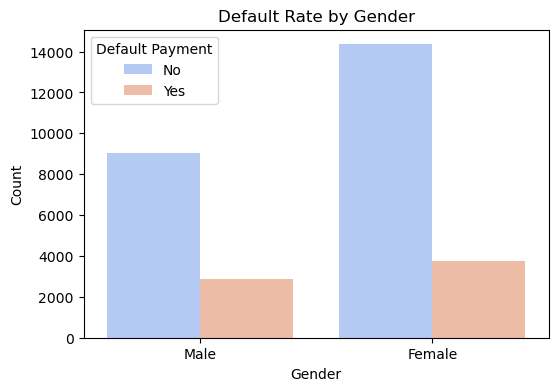

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='GENDER', hue='DEFAULT_PAYMENT', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Default Rate by Gender')
plt.legend(title='Default Payment', labels=['No','Yes'])
plt.show()

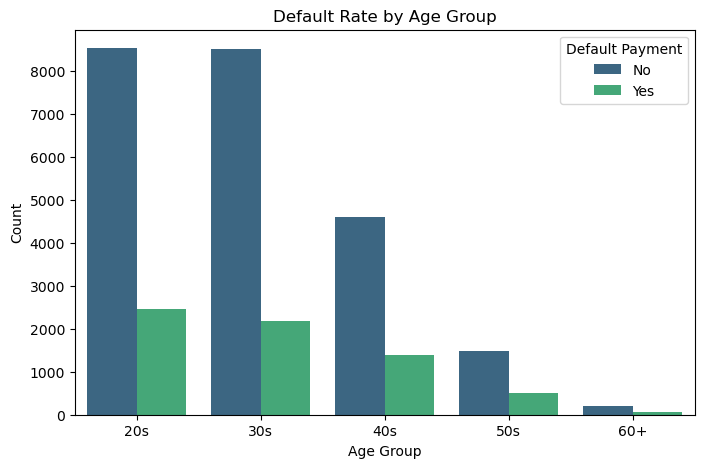

In [33]:
# new column of group by age
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 100], labels=['20s', '30s', '40s', '50s', '60+'])

plt.figure(figsize=(8,5))
sns.countplot(x='AGE_GROUP', hue='DEFAULT_PAYMENT', data=df, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Default Rate by Age Group')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

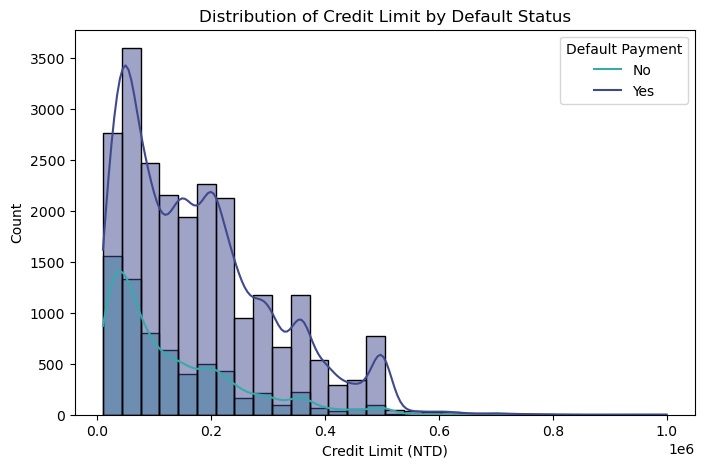

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='LIMIT_BAL', hue='DEFAULT_PAYMENT', bins=30, kde=True, palette='mako')
plt.xlabel('Credit Limit (NTD)')
plt.ylabel('Count')
plt.title('Distribution of Credit Limit by Default Status')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

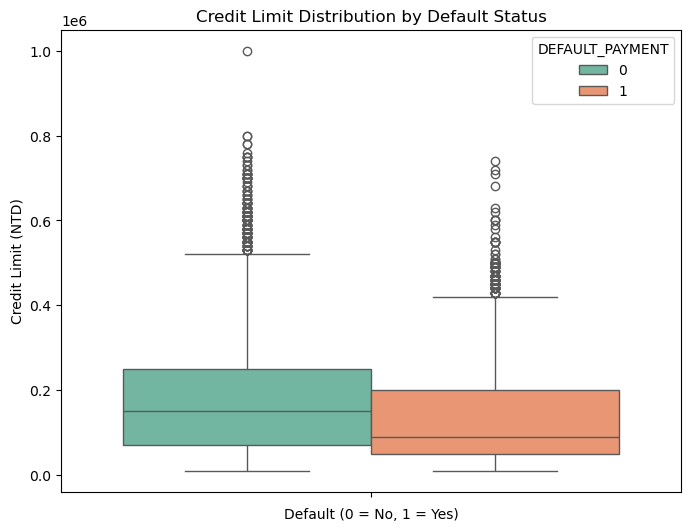

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue="DEFAULT_PAYMENT", y="LIMIT_BAL", data=df, palette="Set2")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit (NTD)")
plt.title("Credit Limit Distribution by Default Status")
plt.show()

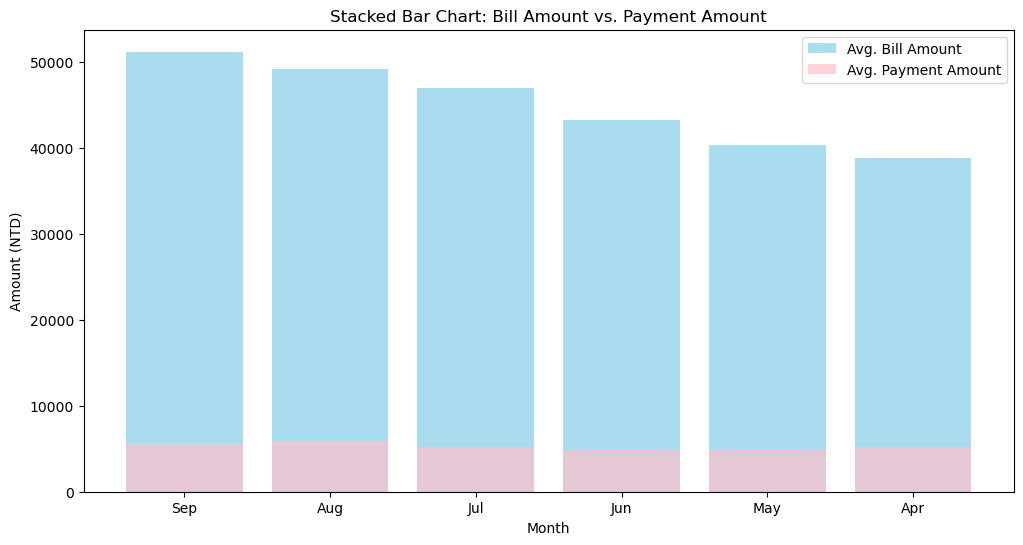

In [36]:
bill_cols = ["BILL_AMT9", "BILL_AMT8", "BILL_AMT7", "BILL_AMT6", "BILL_AMT5", "BILL_AMT4"]
pay_amt_cols = ["PAY_AMT9", "PAY_AMT8", "PAY_AMT7", "PAY_AMT6", "PAY_AMT5", "PAY_AMT4"]

bill_means = df[bill_cols].mean()
pay_means = df[pay_amt_cols].mean()

x = np.arange(len(bill_cols))

plt.figure(figsize=(12, 6))
plt.bar(x, bill_means, label="Avg. Bill Amount", color="skyblue", alpha=0.7)
plt.bar(x, pay_means, label="Avg. Payment Amount", color="pink", alpha=0.7)

plt.xticks(x, labels=["Sep", "Aug", "Jul", "Jun", "May", "Apr"])  # 월 표시
plt.xlabel("Month")
plt.ylabel("Amount (NTD)")
plt.title("Stacked Bar Chart: Bill Amount vs. Payment Amount")
plt.legend()
plt.show()

In [37]:
df = df.drop(['ID','AGE_GROUP'], axis=1)

In [38]:
df.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_ST9',
       'PAY_ST8', 'PAY_ST7', 'PAY_ST6', 'PAY_ST5', 'PAY_ST4', 'BILL_AMT9',
       'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4',
       'PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4',
       'DEFAULT_PAYMENT'],
      dtype='object')

In [39]:
df.describe()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_ST9,PAY_ST8,PAY_ST7,PAY_ST6,PAY_ST5,...,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT9,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,DEFAULT_PAYMENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


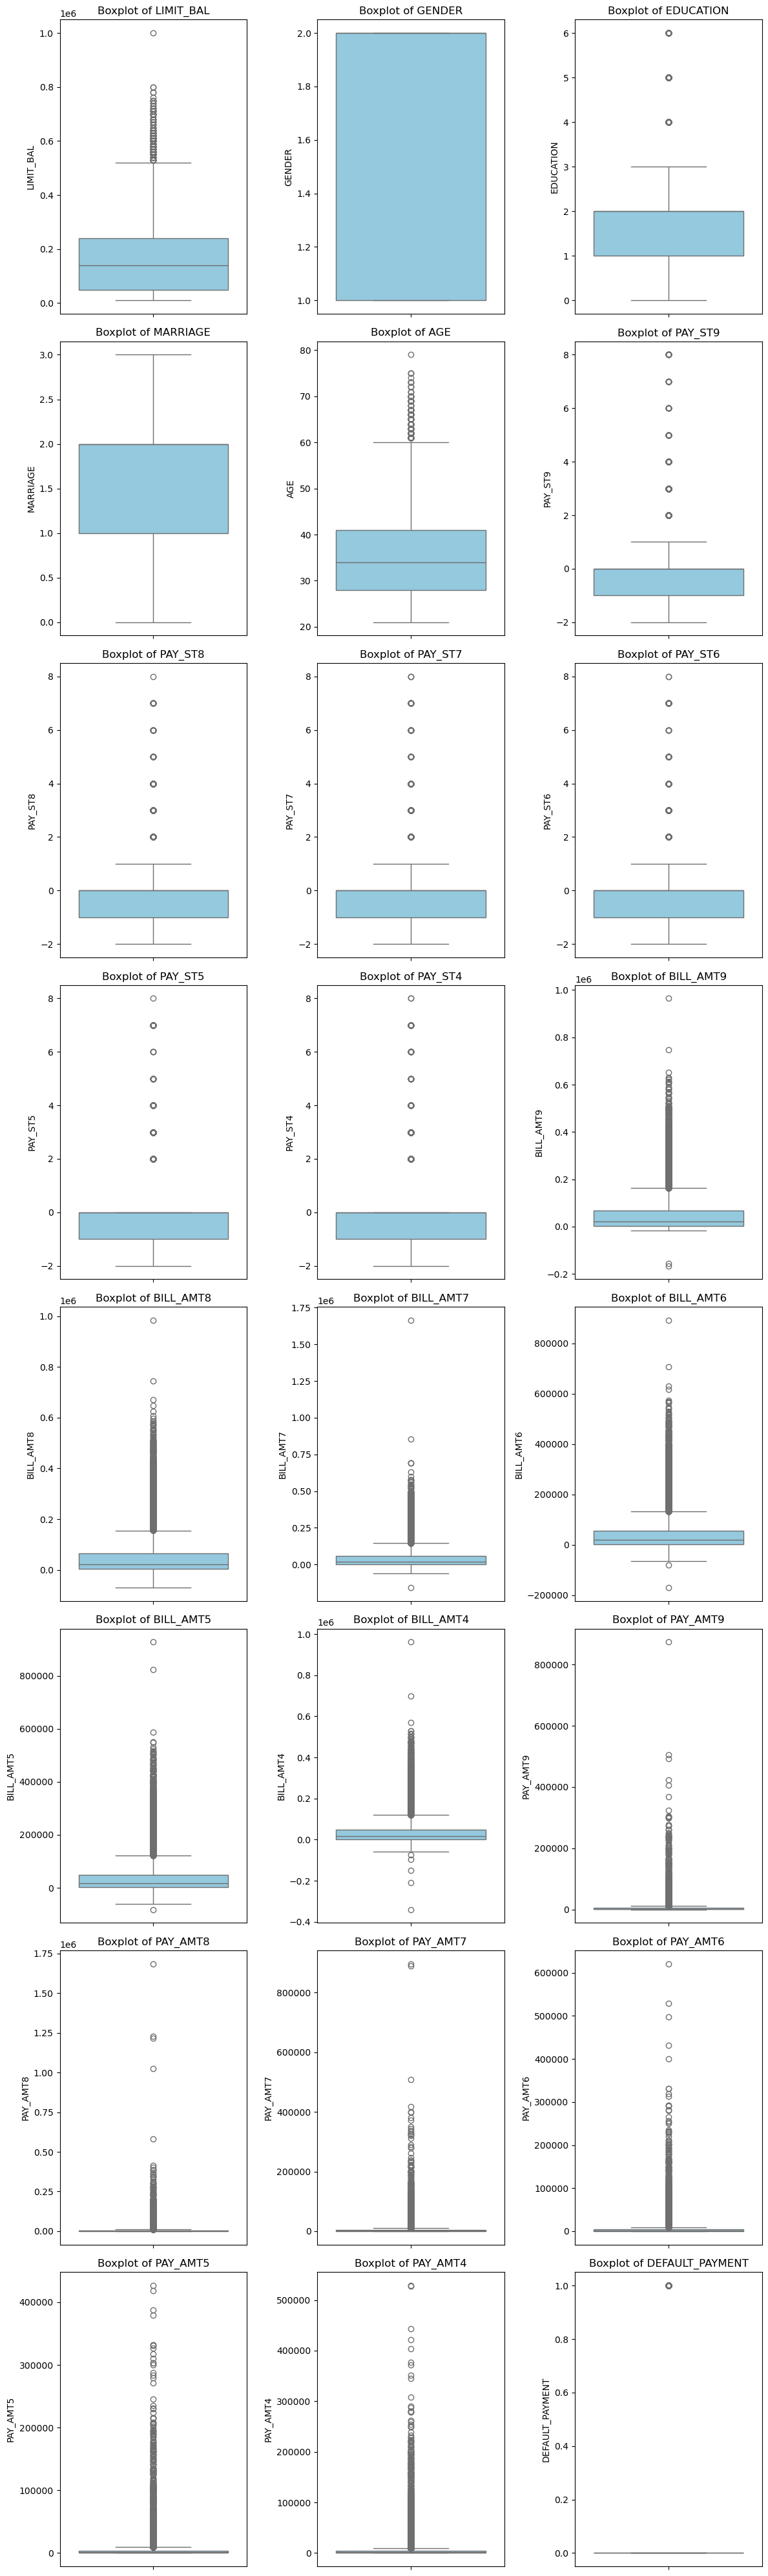

In [43]:
cols_per_row = 3  # 한 줄에 몇 개의 박스플롯을 표시할지
num_plots = len(df.columns)  # 전체 컬럼 개수
num_rows = int(np.ceil(num_plots / cols_per_row))  # 필요한 행 개수

# 서브플롯 생성
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 5 * num_rows))

# 1개의 플롯이면 배열 변환
if num_rows == 1:
    axes = np.array([axes])

axes = axes.flatten()  # 1D 배열로 변환

# 박스플롯 그리기
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()
plt.show()

In [44]:
lower_limit = df['LIMIT_BAL'].quantile(0.00)  # 하위 0%
upper_limit = df['LIMIT_BAL'].quantile(0.95)  # 상위 5%
df['LIMIT_BAL'] = df['LIMIT_BAL'].clip(lower=lower_limit, upper=upper_limit)

df.loc[df['EDUCATION'].isin([5,6]), "EDUCATION"] = 4 # 5,6 we don't know so put the others

In [45]:
# only numerical data type
columns = df.columns
for value in columns:
    Q1 = df[value].quantile(0.25)
    Q3 = df[value].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
     # check number of outliers
    outliers = df[(df[value] < lower_bound) | (df[value] > upper_bound)] 
    num_outliers = outliers.shape[0]
    outlier_ratio = (num_outliers / len(df[value])) * 100
    print(f"{value}: {outlier_ratio: .2f}%")

LIMIT_BAL:  0.00%
GENDER:  0.00%
EDUCATION:  1.51%
MARRIAGE:  0.00%
AGE:  0.91%
PAY_ST9:  10.43%
PAY_ST8:  14.70%
PAY_ST7:  14.03%
PAY_ST6:  11.69%
PAY_ST5:  9.89%
PAY_ST4:  10.26%
BILL_AMT9:  8.00%
BILL_AMT8:  7.98%
BILL_AMT7:  8.23%
BILL_AMT6:  8.74%
BILL_AMT5:  9.08%
BILL_AMT4:  8.98%
PAY_AMT9:  9.15%
PAY_AMT8:  9.05%
PAY_AMT7:  8.66%
PAY_AMT6:  9.98%
PAY_AMT5:  9.82%
PAY_AMT4:  9.86%
DEFAULT_PAYMENT:  22.12%


In [47]:
# we focused on "default rate" so minus values set the 0.
for i in range(4,10):
    df[f"BILL_AMT{i}"] = df[f"BILL_AMT{i}"].clip(lower=0)

In [48]:
# only numerical data type
columns = ["BILL_AMT9", "BILL_AMT8", "BILL_AMT7", "BILL_AMT6", "BILL_AMT5", "BILL_AMT4", 
          "PAY_AMT9", "PAY_AMT8", "PAY_AMT7", "PAY_AMT6", "PAY_AMT5", "PAY_AMT4" ]

for value in columns:
    df[value] = df[value].astype(float)
    
    Q1 = df[value].quantile(0.25)
    Q3 = df[value].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # set median instead of outlier
    median_value = df[value].median()
    df.loc[(df[value] < lower_bound) | (df[value] > upper_bound), value] = median_value
    

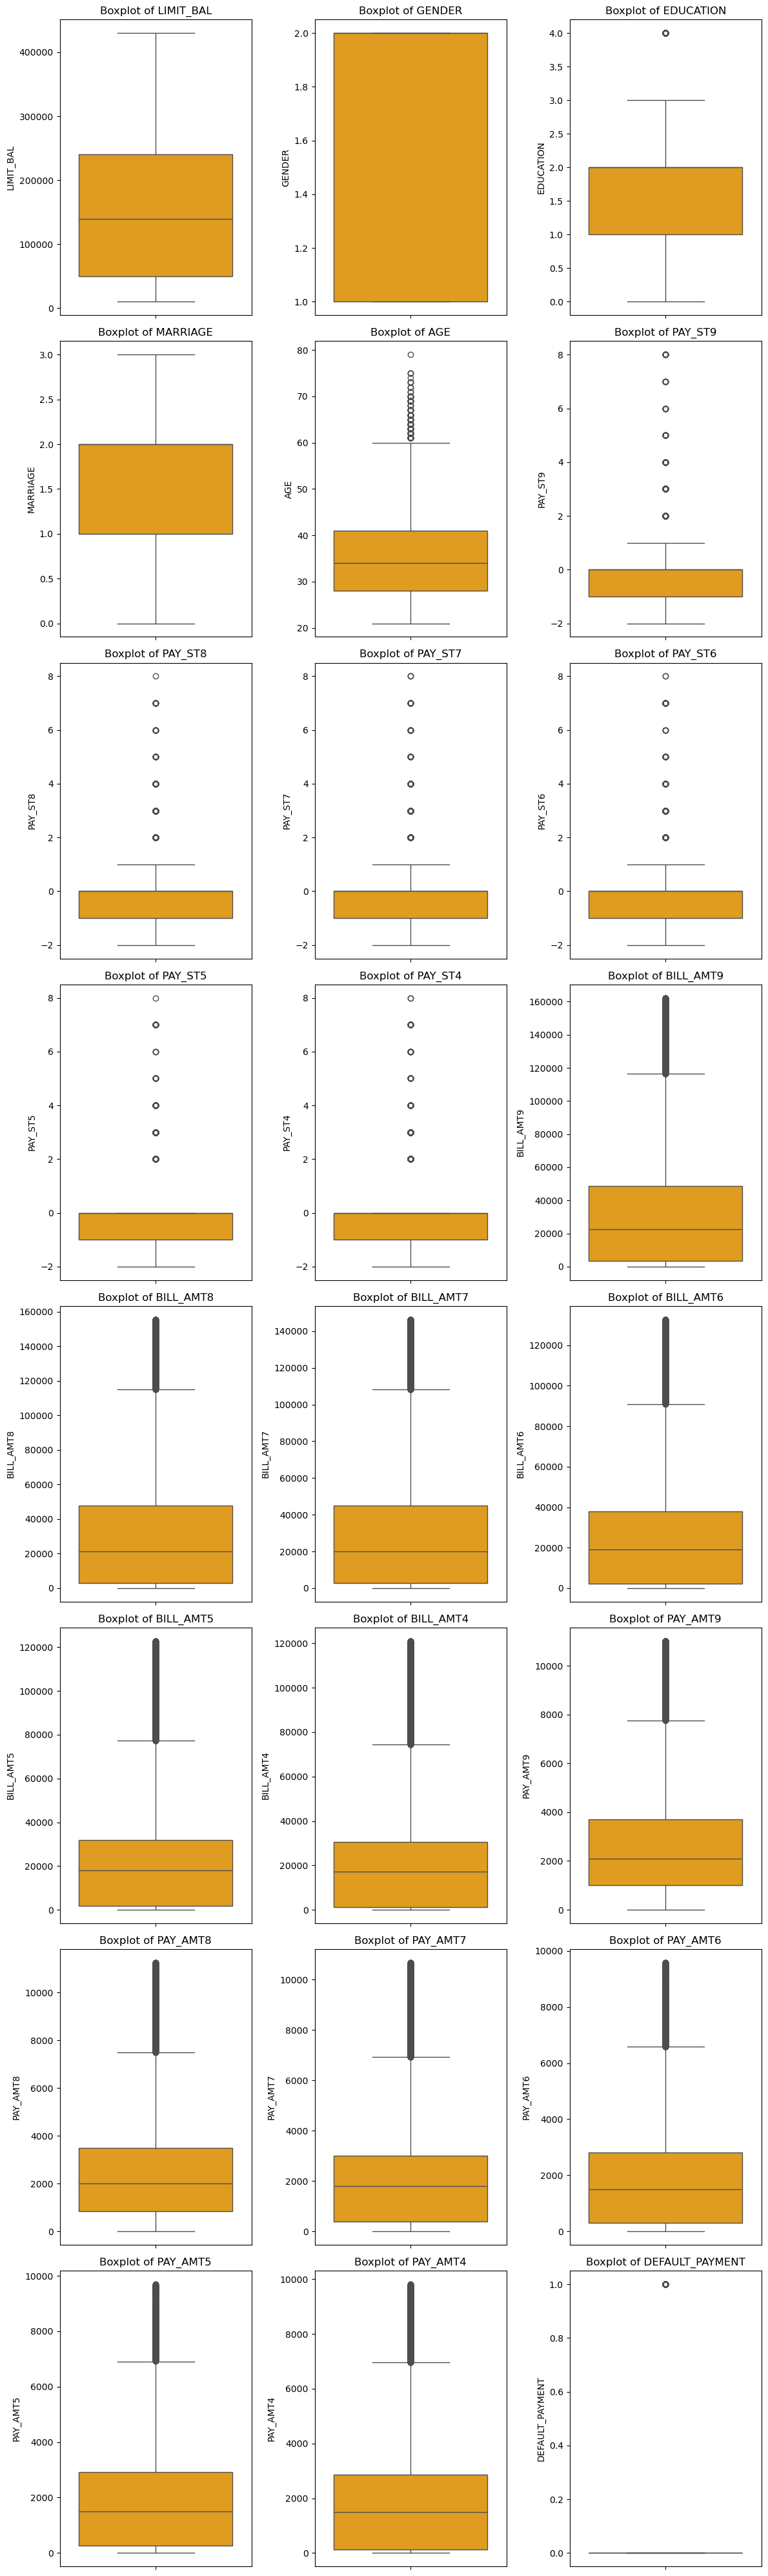

In [50]:
cols_per_row = 3  # 한 줄에 몇 개의 박스플롯을 표시할지
num_plots = len(df.columns)  # 전체 컬럼 개수
num_rows = int(np.ceil(num_plots / cols_per_row))  # 필요한 행 개수

# 서브플롯 생성
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 5 * num_rows))

# 1개의 플롯이면 배열 변환
if num_rows == 1:
    axes = np.array([axes])

axes = axes.flatten()  # 1D 배열로 변환

# 박스플롯 그리기
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()
plt.show()

<Axes: >

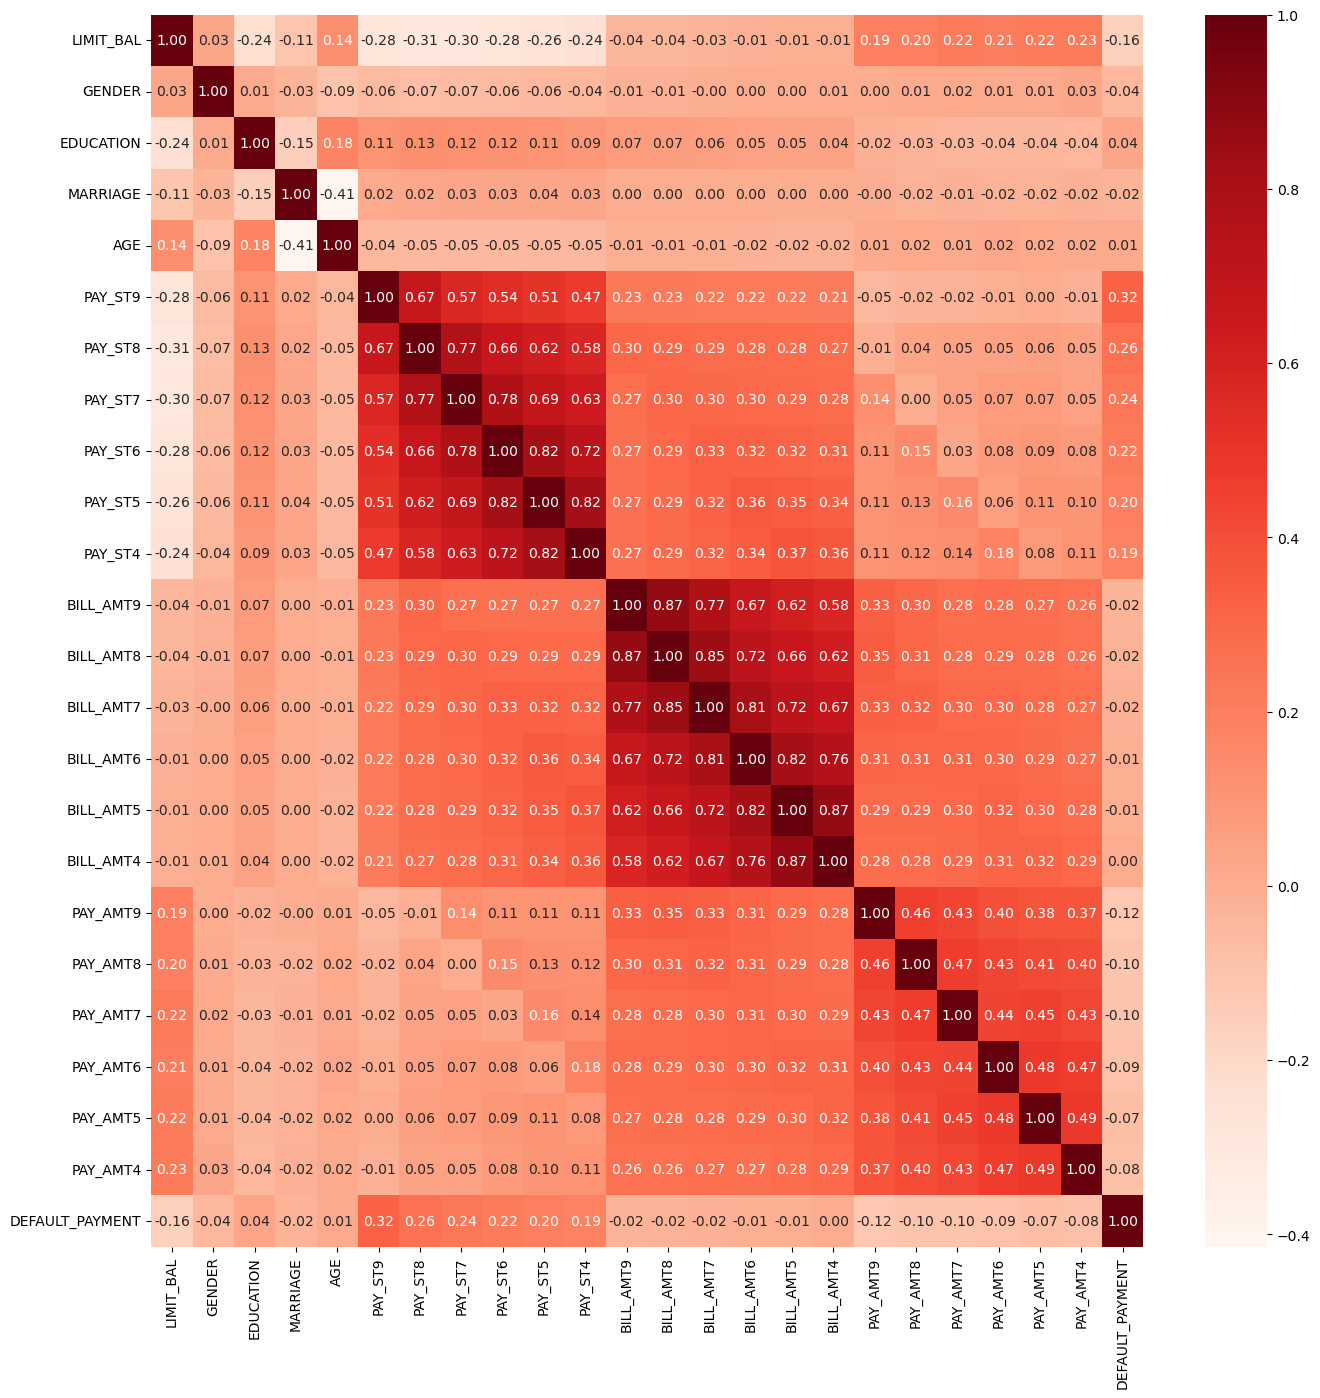

In [51]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f')

The top feature that highly correlated with the target feature is "**PAY_ST9,8,7**"

In [52]:
X_lr = df.drop(['DEFAULT_PAYMENT'], axis=1)
Y_lr = df['DEFAULT_PAYMENT']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_lr, Y_lr, test_size=0.2, random_state=42)

In [57]:
standard_scaler = StandardScaler()
x_train_std = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
x_test_std  = pd.DataFrame(standard_scaler.fit_transform(X_test), columns=X_test.columns)

In [60]:
model_lr = LogisticRegression(random_state=16, max_iter=1000)
model_lr.fit(x_train_std, Y_train)

# probablity for auc-roc cure
lr_probs = model_lr.predict_proba(x_test_std)
lr_probs

array([[0.75550595, 0.24449405],
       [0.89748025, 0.10251975],
       [0.83643256, 0.16356744],
       ...,
       [0.7610604 , 0.2389396 ],
       [0.69604535, 0.30395465],
       [0.85052691, 0.14947309]])

In [70]:
# for hyperparameter tuning and overfitting
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)  

model = LogisticRegression()
scores = cross_val_score(model, x_train_std, Y_train, cv=kf, scoring='accuracy')  # 정확도 평가

print("Cross-validation accuracy:", scores)
print("Mean accuracy:", scores.mean())  # 평균 정확도

Cross-validation accuracy: [0.80395833 0.813125   0.80583333 0.80416667 0.80875   ]
Mean accuracy: 0.8071666666666667


In [63]:
y_pred_train = model_lr.predict(x_train_std)
y_pred = model_lr.predict(x_test_std)

conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[4524,  163],
       [ 992,  321]])

In [67]:
# probablity

print(f"Train Accuracy score for Logistic Regression: {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy score for Logistic Regression: {accuracy_score(Y_test, y_pred):.2f}")
print()
print(classification_report(Y_test, y_pred))

Train Accuracy score for Logistic Regression: 0.81
Test Accuracy score for Logistic Regression: 0.81

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.66      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



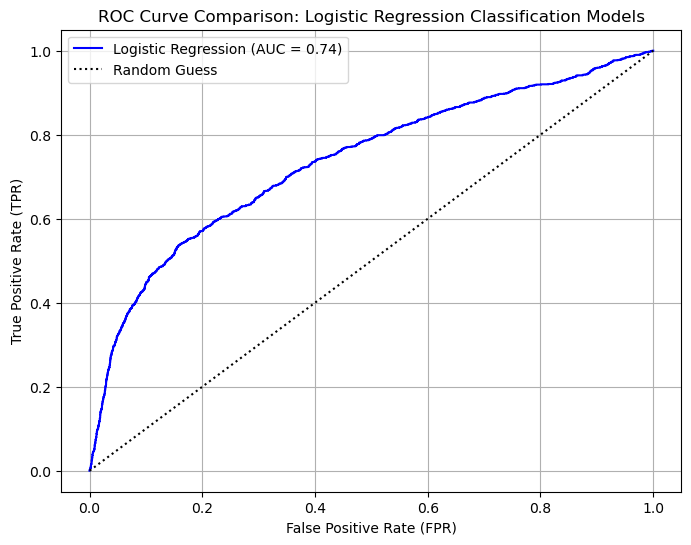

In [69]:
Y_lr_probs = lr_probs[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regression Classification Models")
plt.grid(True)
plt.legend(loc='best') 
plt.show()